<a href="https://colab.research.google.com/github/AlonsoCarr/Repositorio_IA_Alonso/blob/main/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Actividad 6: Redes Neuronales
#Nombre: Alonso Carrizales Mancilla
#Matrícula: 2001625
#Hora: N4

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [18]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


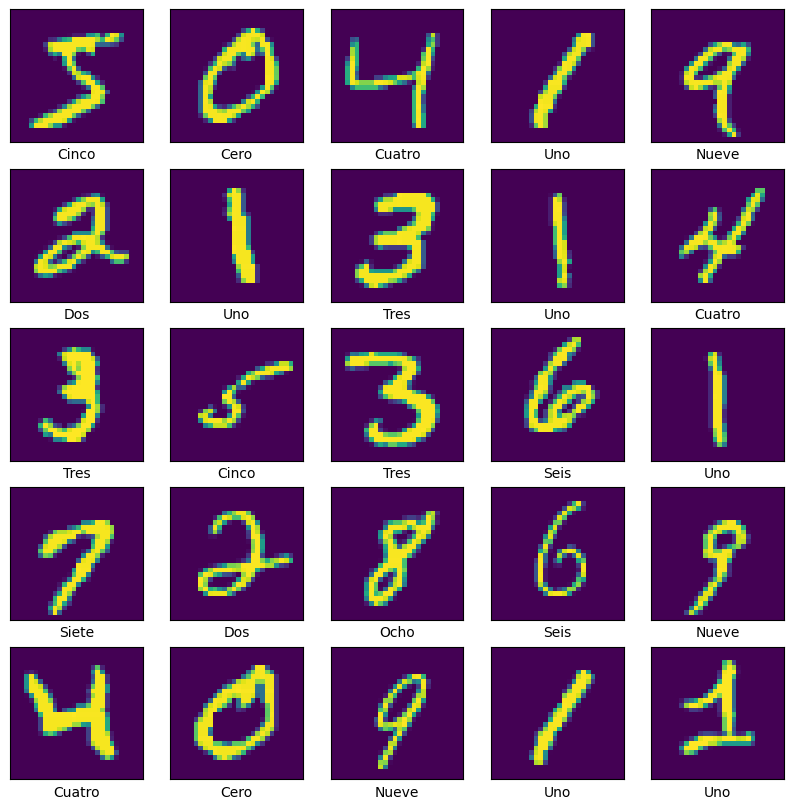

In [19]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
               'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation= 'softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 64s 33ms/step - loss: 0.1424 - accuracy: 0.9581 - val_loss: 0.0462 - val_accuracy: 0.9860
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0307 - val_accuracy: 0.9907
Epoch 3/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0463 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0385 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0195 - accuracy: 0.9941 - val_loss: 0.0334 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0320 - val_accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.0312 -

313/313 - 3s - loss: 0.0321 - accuracy: 0.9917 - 3s/epoch - 8ms/step


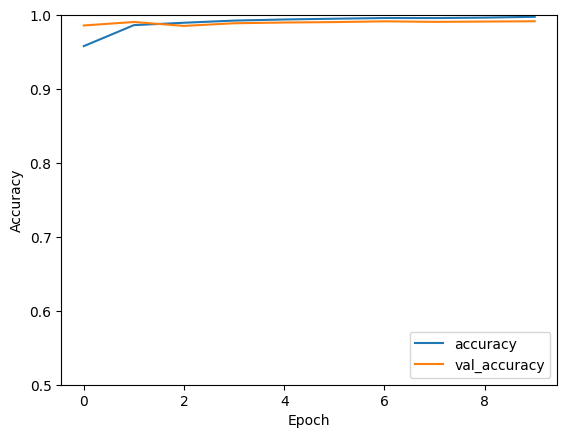

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [27]:
print(test_acc)

0.9916999936103821


In [29]:
predictions = model.predict(test_images)

313/313 [==============================] - 4s 12ms/step


In [30]:
predictions[0]

array([2.1520703e-14, 2.2499608e-08, 5.3427363e-10, 1.4890722e-11,
       1.3555981e-08, 1.8419609e-14, 1.0519877e-16, 9.9999994e-01,
       1.8197827e-14, 4.3092890e-12], dtype=float32)

In [31]:
np.argmax(predictions[0])

7

In [32]:
test_labels[0]

7

In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Predicción 1

Tamaño de imagen:
(28, 28)

única imagen:
(1, 28, 28)

1/1 [==============================] - 0s 30ms/step
Predicción:
[[1.42466158e-13 1.01718106e-10 2.51678400e-10 4.72652950e-13
  2.58619182e-10 5.56354830e-15 3.13770658e-18 1.00000000e+00
  5.57726425e-19 1.14691601e-09]]

Número de etiqueta


7

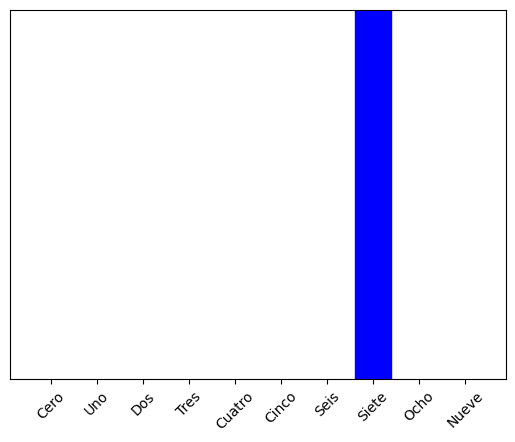

In [35]:
# Predicción de Imagenes
print('Predicción 1')
print('')

img = test_images[60]
print('Tamaño de imagen:')
print(img.shape)
print('')

img = (np.expand_dims(img,0))
print('única imagen:')
print(img.shape)
print('')

predictions_single = model.predict(img)
print('Predicción:')
print(predictions_single)
print('')

plot_value_array(60, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print('Número de etiqueta')
np.argmax(predictions_single[0])

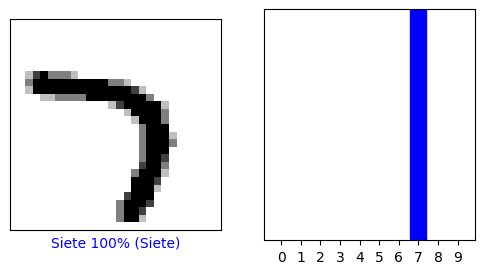

In [37]:
i = 60
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción 2

Tamaño de imagen:
(28, 28)

única imagen:
(1, 28, 28)

1/1 [==============================] - 0s 21ms/step
Predicción:
[[2.3009127e-14 6.7745735e-17 1.3790188e-09 3.3414813e-13 7.6663004e-16
  1.6230527e-14 1.8689572e-13 8.8217960e-18 1.0000000e+00 1.4330619e-12]]

Número de etiqueta


8

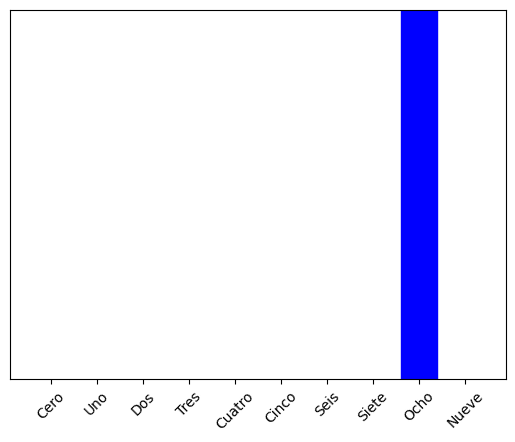

In [38]:
# Predicción de Imagenes
print('Predicción 2')
print('')

img = test_images[61]
print('Tamaño de imagen:')
print(img.shape)
print('')

img = (np.expand_dims(img,0))
print('única imagen:')
print(img.shape)
print('')

predictions_single = model.predict(img)
print('Predicción:')
print(predictions_single)
print('')

plot_value_array(61, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print('Número de etiqueta')
np.argmax(predictions_single[0])

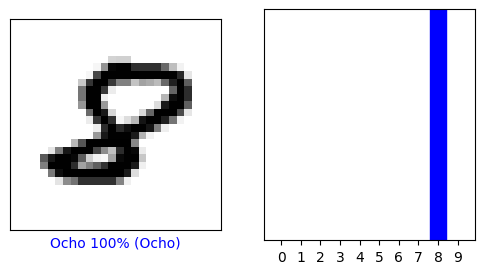

In [39]:
i = 61
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción 3

Tamaño de imagen:
(28, 28)

única imagen:
(1, 28, 28)

1/1 [==============================] - 0s 22ms/step
Predicción:
[[1.1429686e-06 2.7251184e-08 1.0832922e-06 2.5726949e-06 2.4942076e-04
  4.3008171e-02 1.3363396e-04 2.2109784e-03 1.5210012e-03 9.5287192e-01]]

Número de etiqueta


9

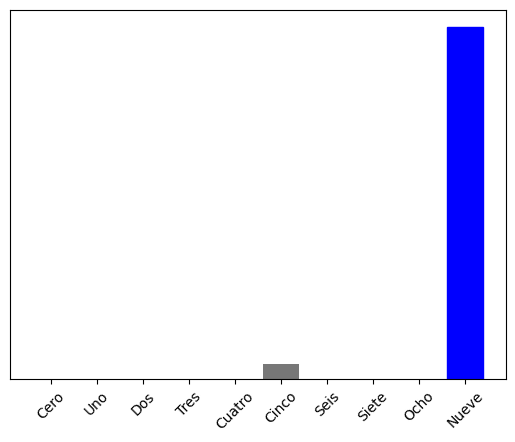

In [40]:
# Predicción de Imagenes
print('Predicción 3')
print('')

img = test_images[62]
print('Tamaño de imagen:')
print(img.shape)
print('')

img = (np.expand_dims(img,0))
print('única imagen:')
print(img.shape)
print('')

predictions_single = model.predict(img)
print('Predicción:')
print(predictions_single)
print('')

plot_value_array(62, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print('Número de etiqueta')
np.argmax(predictions_single[0])

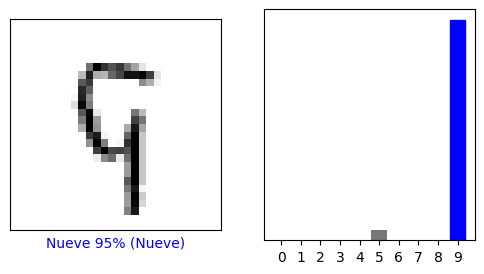

In [41]:
i = 62
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción 4

Tamaño de imagen:
(28, 28)

única imagen:
(1, 28, 28)

1/1 [==============================] - 0s 25ms/step
Predicción:
[[1.1037540e-12 3.5307637e-10 1.0892589e-06 9.9999893e-01 1.0113752e-12
  2.1228054e-10 8.6153023e-16 1.5794447e-09 2.2818958e-09 1.3020313e-09]]

Número de etiqueta


3

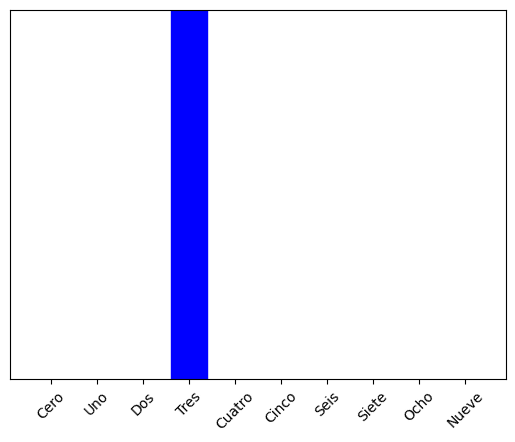

In [42]:
# Predicción de Imagenes
print('Predicción 4')
print('')

img = test_images[63]
print('Tamaño de imagen:')
print(img.shape)
print('')

img = (np.expand_dims(img,0))
print('única imagen:')
print(img.shape)
print('')

predictions_single = model.predict(img)
print('Predicción:')
print(predictions_single)
print('')

plot_value_array(63, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print('Número de etiqueta')
np.argmax(predictions_single[0])

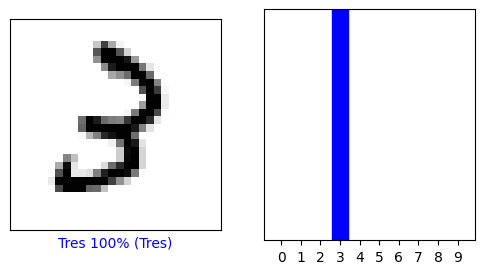

In [43]:
i = 63
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción 5

Tamaño de imagen:
(28, 28)

única imagen:
(1, 28, 28)

1/1 [==============================] - 0s 31ms/step
Predicción:
[[3.3857425e-14 1.8503769e-06 5.7769629e-08 2.1724727e-08 6.8432919e-06
  2.3646224e-13 3.3765298e-16 9.9999118e-01 1.8045261e-12 2.6091534e-10]]

Número de etiqueta


7

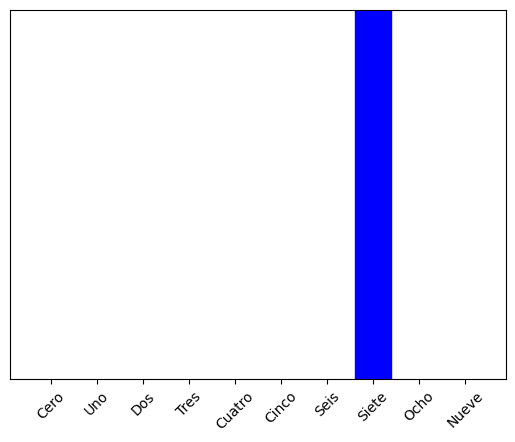

In [46]:
# Predicción de Imagenes
print('Predicción 5')
print('')

img = test_images[64]
print('Tamaño de imagen:')
print(img.shape)
print('')

img = (np.expand_dims(img,0))
print('única imagen:')
print(img.shape)
print('')

predictions_single = model.predict(img)
print('Predicción:')
print(predictions_single)
print('')

plot_value_array(64, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print('Número de etiqueta')
np.argmax(predictions_single[0])

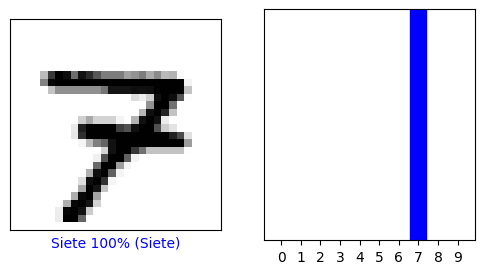

In [47]:
i = 64
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()